In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import ca_hospitals_data

%matplotlib inline

In [2]:
data = ca_hospitals_data.get_county("San Francisco")

INFO:root:Got 50 results out of 106 ...
INFO:root:Got 100 results out of 106 ...
INFO:root:Got 106 results out of 106 ...
INFO:root:Collected all pages


In [3]:
df = pd.DataFrame(data.get("series"))

In [4]:
df.head()

,_id,all_hospital_beds,county,hospitalized_covid_confirmed_patients,hospitalized_covid_patients,hospitalized_suspected_covid_patients,icu_available_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,rank,todays_date
0,97,NaN,San Francisco,58.0,NaN,92.0,90.0,18.0,7.0,0.090167,2020-03-30T00:00:00
1,150,NaN,San Francisco,67.0,NaN,69.0,77.0,30.0,14.0,0.090167,2020-03-31T00:00:00
2,205,NaN,San Francisco,67.0,NaN,66.0,64.0,30.0,8.0,0.090167,2020-04-01T00:00:00
3,257,NaN,San Francisco,75.0,NaN,60.0,58.0,32.0,11.0,0.090167,2020-04-02T00:00:00
4,312,NaN,San Francisco,80.0,NaN,71.0,74.0,39.0,8.0,0.090167,2020-04-03T00:00:00


In [8]:
# Convert the date values to datetime type
df["todays_date"] = pd.to_datetime(
    df["todays_date"], infer_datetime_format=True
)

# Sort and set the date as the index
df = df.sort_values("todays_date").set_index("todays_date")
             
df.head()

,_id,all_hospital_beds,county,hospitalized_covid_confirmed_patients,hospitalized_covid_patients,hospitalized_suspected_covid_patients,icu_available_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,rank
todays_date,,,,,,,,,,
2020-03-29,12,NaN,San Francisco,50.0,NaN,73.0,61.0,24.0,10.0,0.090167
2020-03-30,97,NaN,San Francisco,58.0,NaN,92.0,90.0,18.0,7.0,0.090167
2020-03-31,150,NaN,San Francisco,67.0,NaN,69.0,77.0,30.0,14.0,0.090167
2020-04-01,205,NaN,San Francisco,67.0,NaN,66.0,64.0,30.0,8.0,0.090167
2020-04-02,257,NaN,San Francisco,75.0,NaN,60.0,58.0,32.0,11.0,0.090167


In [42]:
sf_confirmed = df[['hospitalized_covid_confirmed_patients']]
sf_confirmed.head(10)

,hospitalized_covid_confirmed_patients
todays_date,
2020-03-29,50.0
2020-03-30,58.0
2020-03-31,67.0
2020-04-01,67.0
2020-04-02,75.0
2020-04-03,80.0
2020-04-04,80.0
2020-04-05,79.0
2020-04-06,80.0


In [40]:
sf_confirmed.rolling('7D').mean().head(10)

,hospitalized_covid_confirmed_patients
todays_date,
2020-03-29,50.000000
2020-03-30,54.000000
2020-03-31,58.333333
2020-04-01,60.500000
2020-04-02,63.400000
2020-04-03,66.166667
2020-04-04,68.142857
2020-04-05,72.285714
2020-04-06,75.428571


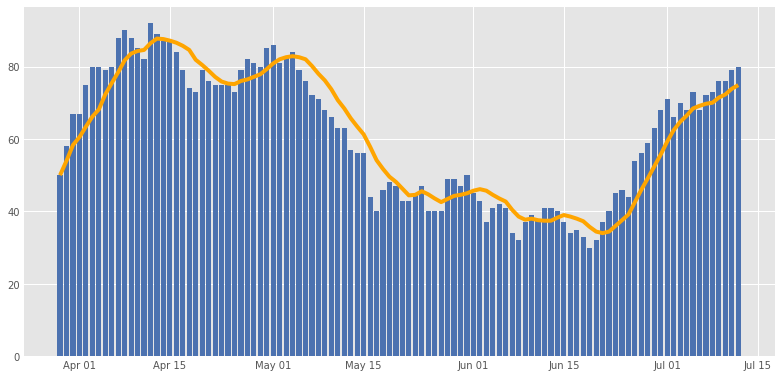

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.style.use("seaborn-deep")
plt.bar(x=sf_confirmed.index, height=sf_confirmed["hospitalized_covid_confirmed_patients"])
plt.plot(sf_confirmed.rolling('7D').mean(), color='orange')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d')) 